In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### Récupérer les données dans train et test

Chaque ligne contient les séries pour les 3 capteurs puis la classe:

    | 476 mesures pour capteur 1 | 476 mesures pour capteur 2 | 476 mesures pour capteur 3 | Chiffre vu |

In [3]:
from tools.data import get_datasets

train, test = get_datasets()
print train.shape
print test.shape

MU.txt
Reading data file
(10000, 1905)
(2818, 1905)


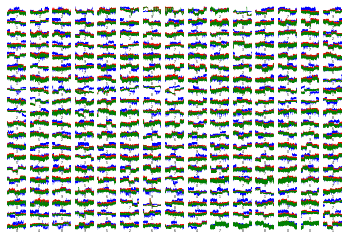

In [9]:
rows = 20
cols = 15

for i in range(rows * cols):
    
    code = train[i,-1]
    
    axe = plt.subplot(rows, cols, i)
    plt.setp(axe, 'frame_on', False)
    axe.set_xticks([])
    axe.set_yticks([])
    axe.xaxis.set_label_coords(0.5, 0.2)
    axe.set_xlabel(str(code), size=3)
    axe.plot(train[i,0:476], linewidth=0.2, c='b')
    axe.plot(train[i,476:476*2], linewidth=0.2, c='r')
    axe.plot(train[i,476*2:476*3], linewidth=0.2, c='g')
    # axe.set_title(str(code))

plt.savefig('test.pdf', format='pdf')

plt.show()

    